# Electrical Stability

## Imports

In [ ]:
import logging

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Carga de Datos

In [624]:
def load_data(file_path):
    """Load data from a CSV file into a pandas DataFrame."""
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        logging.error(f"Error loading data: {e}")
        return pd.DataFrame()

In [625]:
df = load_data('../data/Tema_16.csv') # Load the dataset

## Análisis exploratorio

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    9518 non-null   object 
 1   tau2    9508 non-null   float64
 2   tau3    9510 non-null   float64
 3   tau4    9510 non-null   float64
 4   p1      9516 non-null   float64
 5   p2      9509 non-null   float64
 6   p3      9509 non-null   float64
 7   p4      9509 non-null   float64
 8   g1      9511 non-null   float64
 9   g2      9509 non-null   float64
 10  g3      9510 non-null   float64
 11  g4      9508 non-null   float64
 12  stab    9510 non-null   float64
 13  stabf   9510 non-null   object 
dtypes: float64(12), object(2)
memory usage: 1.1+ MB


In [627]:
# Transform tau1 into float and stabf into string
df['tau1'] = pd.to_numeric(df['tau1'], errors='coerce')
df['stabf'] = df['stabf'].astype(str)

In [628]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,9418.000000,9508.000000,9510.000000,9510.000000,9516.000000,9509.000000,9509.000000,9509.000000,9511.000000,9509.000000,9510.000000,9508.000000,9510.000000
mean,6.262916,5.244768,5.248410,5.247679,4.331609,-1.249897,-1.250695,-1.249889,0.625221,0.525705,0.525133,0.523920,0.015830
std,10.086302,2.738029,2.741857,2.741789,5.675074,0.433278,0.432702,0.432560,1.008878,0.274289,0.274135,0.274258,0.036903
min,0.500793,0.501582,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.907193,2.879708,2.870172,2.871294,3.221693,-1.625225,-1.626675,-1.624413,0.288739,0.288725,0.287669,0.286650,-0.015425
50%,5.328759,5.236041,5.235974,5.250743,3.762752,-1.250501,-1.249917,-1.250992,0.530080,0.525747,0.524528,0.523747,0.017207
75%,7.695478,7.611048,7.622416,7.623121,4.300006,-0.873343,-0.875962,-0.874745,0.769924,0.763756,0.762486,0.760747,0.044958
max,99.994695,9.999837,9.999450,9.999443,58.644180,-0.500108,-0.500072,-0.500025,9.999371,0.999944,0.999839,0.999930,0.109403


In [629]:
df.isnull().sum()

tau1     592
tau2     502
tau3     500
tau4     500
p1       494
p2       501
p3       501
p4       501
g1       499
g2       501
g3       500
g4       502
stab     500
stabf      0
dtype: int64

In [630]:
# Impossible ranages based on the provided data description

tau1_invalid = df[(df['tau1'] <= 0.5) | (df['tau1'] >= 10)]

tol = 1e-6

p1_invalid = df[abs(df['p1'] - abs(df['p2'] + df['p3'] + df['p4'])) > tol]
p2_invalid = df[(df['p2'] <= -2) | (df['p2'] >= -0.5)]
p3_invalid = df[(df['p3'] <= -2) | (df['p3'] >= -0.5)]
p4_invalid = df[(df['p4'] <= -2) | (df['p4'] >= -0.5)]

g1_invalid = df[(df['g1'] <= 0.05) | (df['g1'] >= 1)]
g2_invalid = df[(df['g2'] <= 0.05) | (df['g2'] >= 1)]
g3_invalid = df[(df['g3'] <= 0.05) | (df['g3'] >= 1)]
g4_invalid = df[(df['g4'] <= 0.05) | (df['g4'] >= 1)]

# if stab is positive, stabf should be 'unstable'
stabf_invalid = df[(df['stab'] > 0) & (df['stabf'] != 'unstable')]
# if stab is negative, stabf should be 'stable'
stabf_invalid = pd.concat([stabf_invalid, df[(df['stab'] < 0) & (df['stabf'] != 'stable')]])
# filter out entries where stabf is nan, None or empty string
stabf_invalid = stabf_invalid[~stabf_invalid['stabf'].isin(['nan', 'None', ''])]

print(f"Invalid tau1 entries: {len(tau1_invalid)}")
print(f"Invalid p1 entries: {len(p1_invalid)}")
print(f"Invalid p2 entries: {len(p2_invalid)}")
print(f"Invalid p3 entries: {len(p3_invalid)}")
print(f"Invalid p4 entries: {len(p4_invalid)}")
print(f"Invalid g1 entries: {len(g1_invalid)}")
print(f"Invalid g2 entries: {len(g2_invalid)}")
print(f"Invalid g3 entries: {len(g3_invalid)}")
print(f"Invalid g4 entries: {len(g4_invalid)}")
print(f"Invalid stabf entries: {len(stabf_invalid)}")

Invalid tau1 entries: 100
Invalid p1 entries: 89
Invalid p2 entries: 0
Invalid p3 entries: 0
Invalid p4 entries: 0
Invalid g1 entries: 101
Invalid g2 entries: 0
Invalid g3 entries: 0
Invalid g4 entries: 0
Invalid stabf entries: 0


Descartamos el caso donde stabf es nulo ya que esos casos son contemplados cuando se traten los valores nulos, no inválidos.

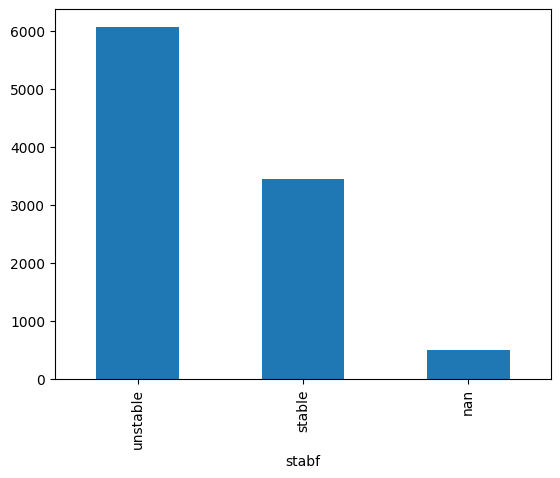

In [631]:
_ = df['stabf'].value_counts().plot(kind='bar')

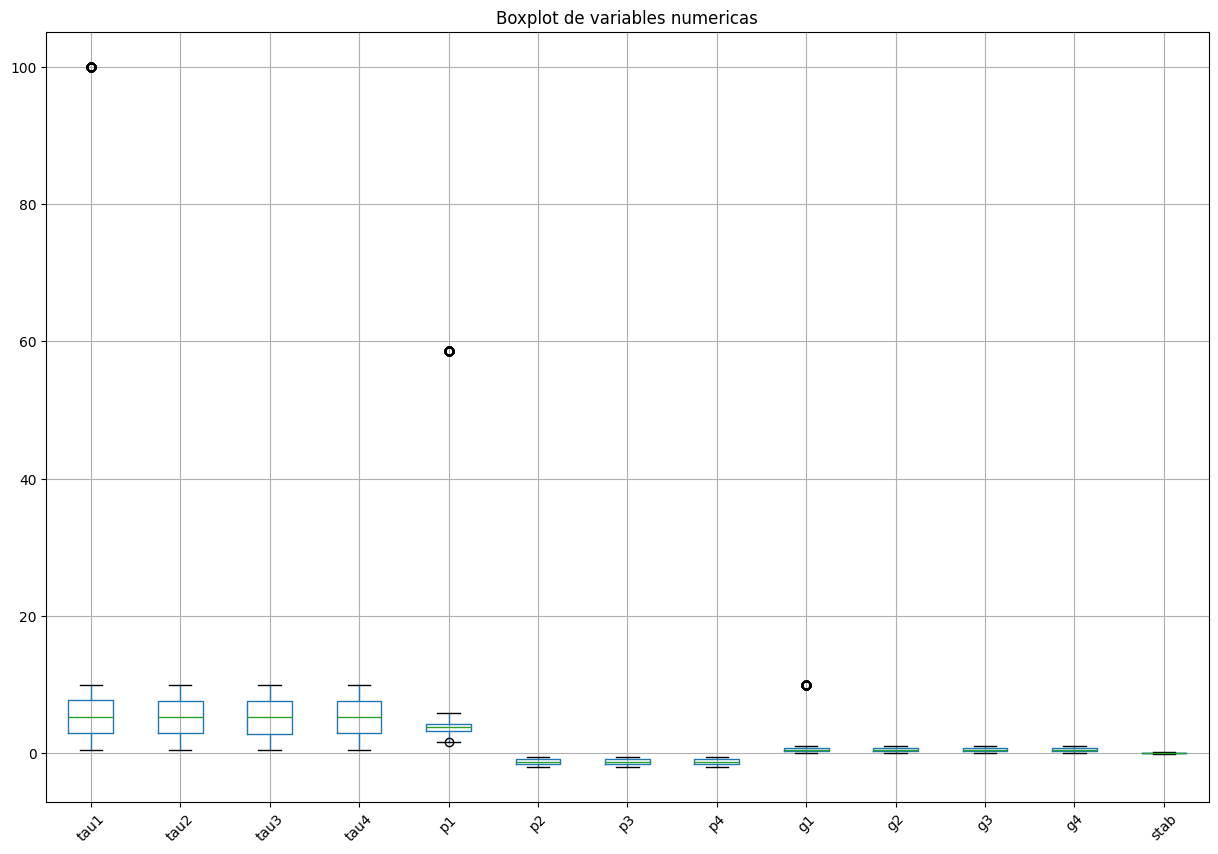

In [632]:
# Hacer un boxplot de las variables numericas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot(rot=45)
plt.title('Boxplot de variables numericas')
plt.show()

## Pretratamiento de datos

In [633]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

cols = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab']

# Imputar la media sin considerar outliers
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col].mean()
    df[col].fillna(mean_value, inplace=True)

# Calcular stabf en caso de no existir o ser texto 'nan'
# hacer que donde diga 'nan' en stabf, se reemplace por NaN
df['stabf'] = df['stabf'].replace('nan', np.nan)
df['stabf'] = df['stabf'].fillna(df['stab'].apply(lambda x: 'unstable' if x > 0 else 'stable'))

# Eliminar outliers
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

/tmp/ipykernel_32472/4280542050.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
/tmp/ipykernel_32472/4280542050.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [634]:
# Eliminar filas con valores invalidos (se eliminan todas las filas que tengan algun valor invalido)

df = df[~df.index.isin(tau1_invalid.index)]

df = df[~df.index.isin(p1_invalid.index)]
df = df[~df.index.isin(p2_invalid.index)]
df = df[~df.index.isin(p3_invalid.index)]
df = df[~df.index.isin(p4_invalid.index)]

df = df[~df.index.isin(g1_invalid.index)]
df = df[~df.index.isin(g2_invalid.index)]
df = df[~df.index.isin(g3_invalid.index)]
df = df[~df.index.isin(g4_invalid.index)]

df = df[~df.index.isin(stabf_invalid.index)]


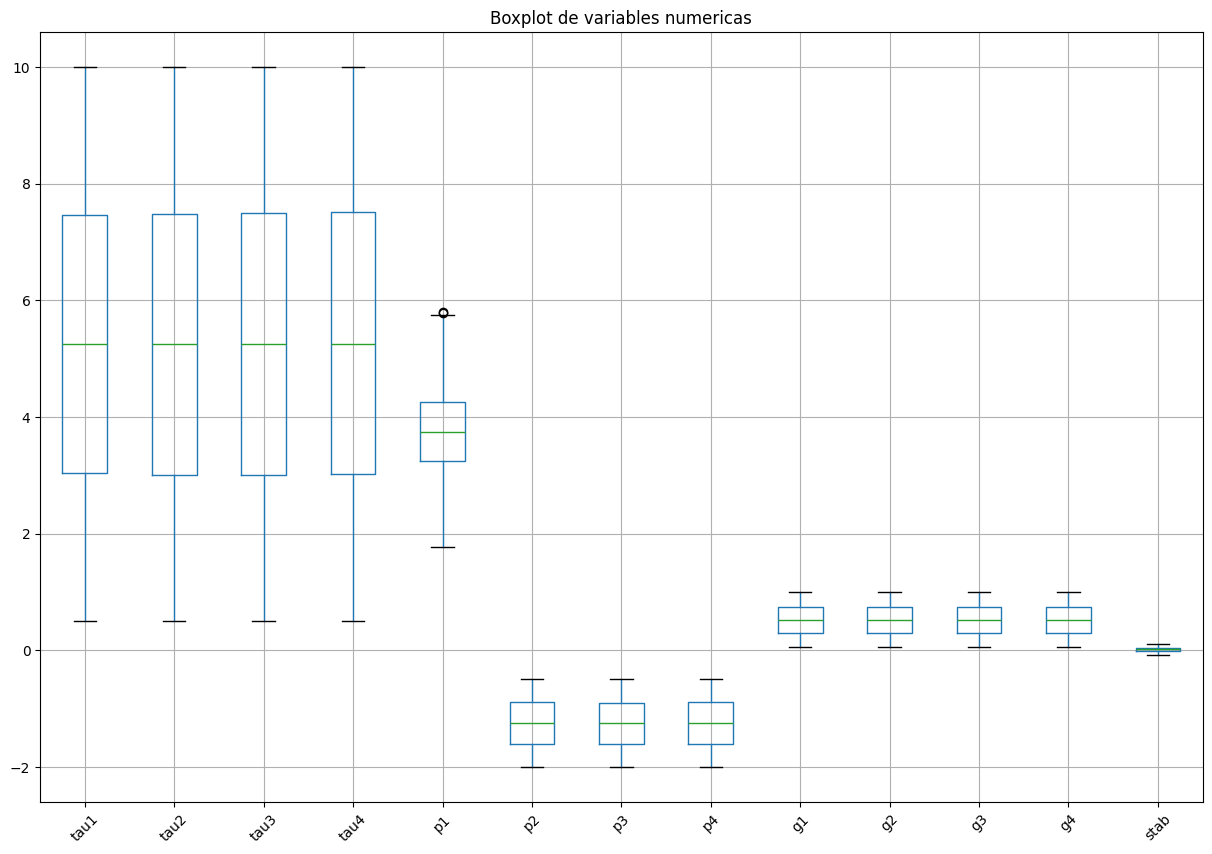

In [635]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot(rot=45)
plt.title('Boxplot de variables numericas')
plt.show()

In [636]:
# find unique values in stabf
unique_stabf = df['stabf'].unique()
print(f"Unique values in stabf: {unique_stabf}")

nan_stabf_count = df['stabf'].isna().sum()
print(f"Cantidad de filas donde stabf es nan: {nan_stabf_count}")

# Codificacion de variables categoricas (stabf)
df['stabf'] = df['stabf'].map({'stable': 0, 'unstable': 1})

# Cantidad de filas finales
print(f"Cantidad de filas finales: {len(df)}")

Unique values in stabf: ['unstable' 'stable']
Cantidad de filas donde stabf es nan: 0
Cantidad de filas finales: 9694


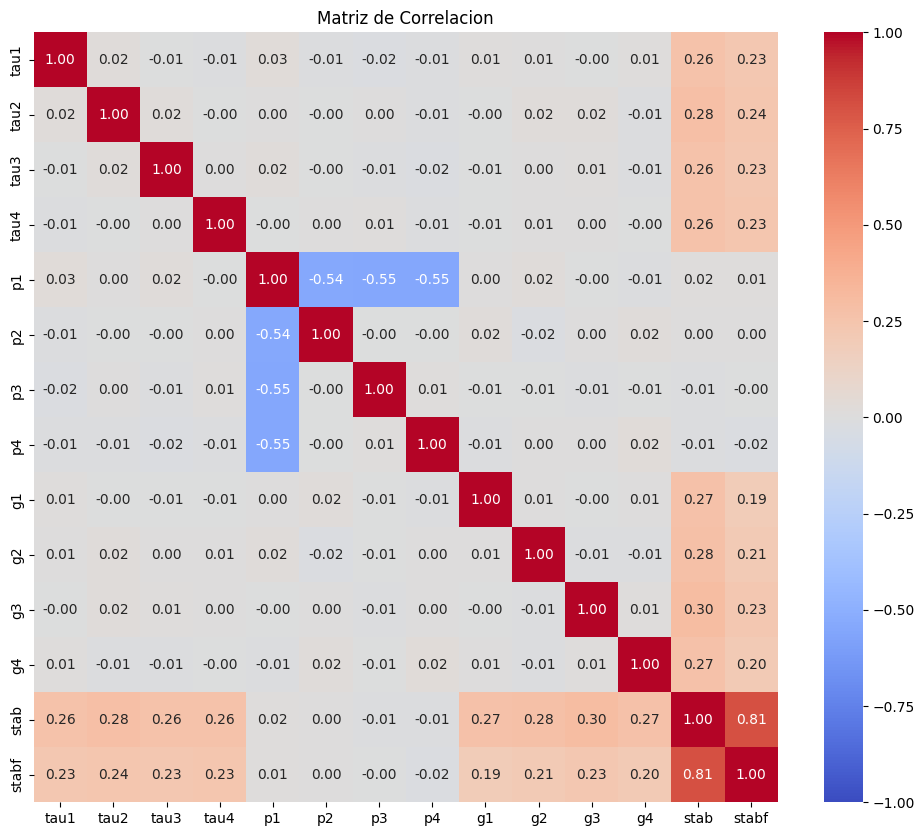

In [637]:
# Matriz de correlacion
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
# Color siempre entre -1 y 1
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlacion')
plt.show()

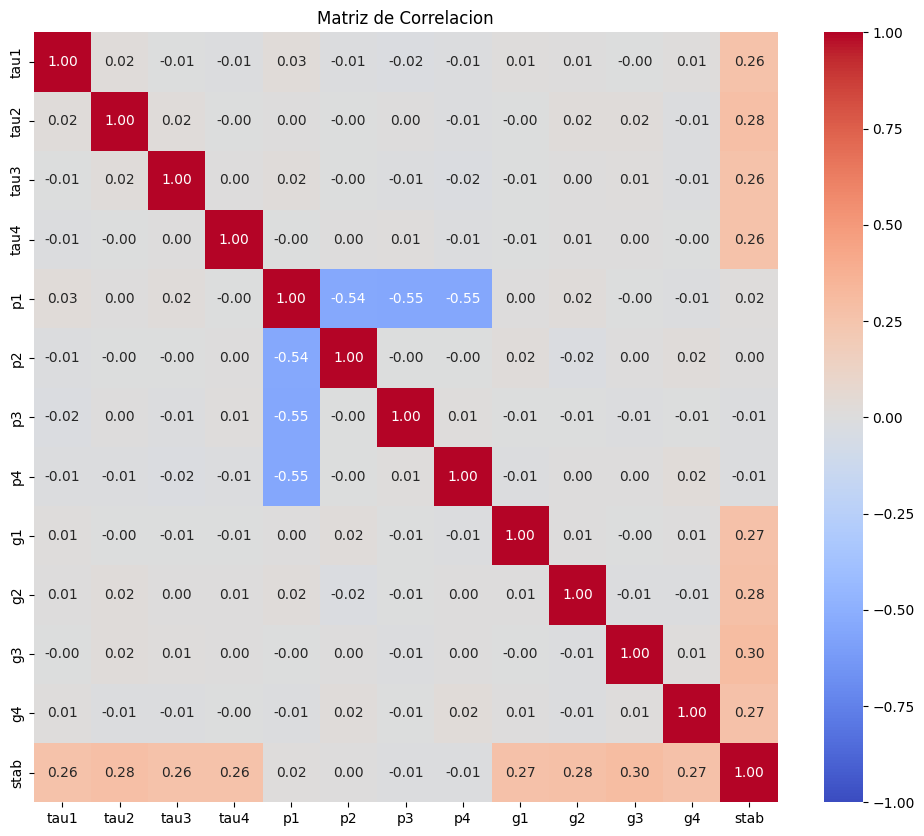

In [638]:
# Eliminar columna stabf
df.drop('stabf', axis=1, inplace=True)


plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
# Color siempre entre -1 y 1
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlacion')
plt.show()

## Estudio mediante PCA

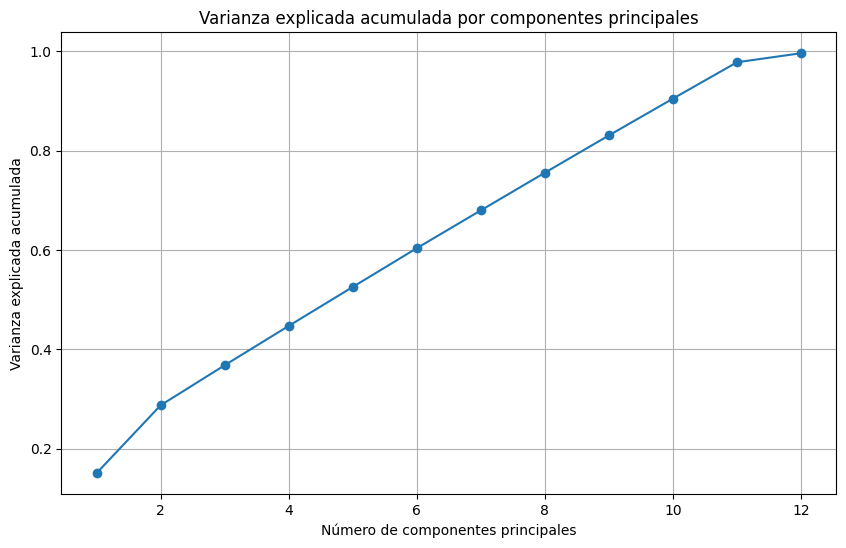

In [639]:
# Normalizacion de datos

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

n = 12
pca = PCA(n_components=n)
pca.fit(df_scaled)
pca.explained_variance_ratio_

# Graficar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()

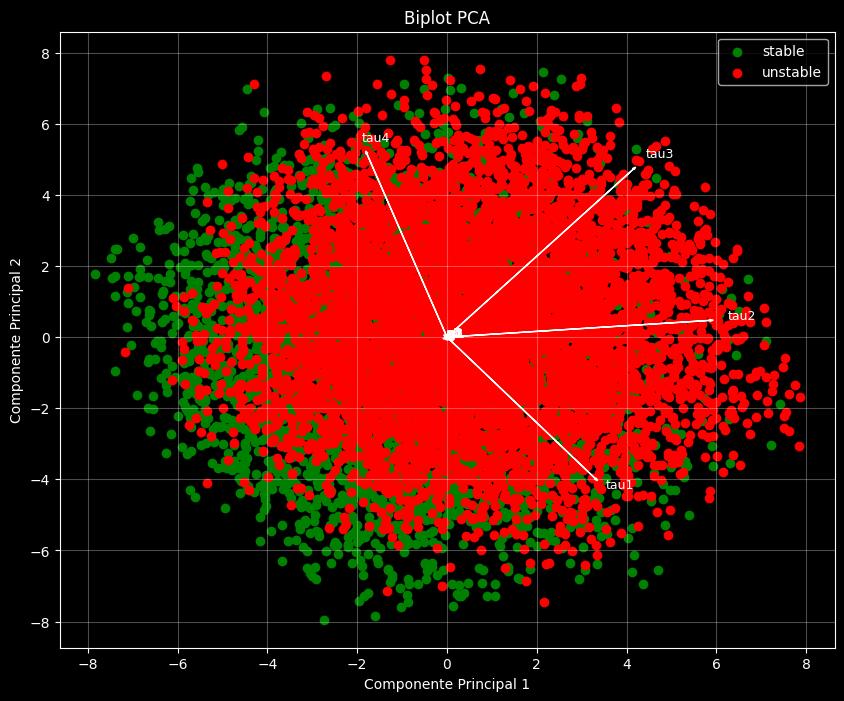

In [640]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target
df_features = df.drop('stab', axis=1)
stab_values = df['stab']

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_features)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Add stability labels based on stab column
df_pca['stability'] = stab_values.apply(lambda x: 'stable' if x <= 0 else 'unstable').values

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Set dark theme
plt.style.use('dark_background')

plt.figure(figsize=(10, 8))

# Plot with colors: green for stable, red for unstable
colors = {'stable': 'green', 'unstable': 'red'}
for stability, group in df_pca.groupby('stability'):
    plt.scatter(group['PC1'], group['PC2'], 
                c=colors[stability], 
                label=stability)

plt.title('Biplot PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Draw loadings in white (excluding stab variable)
for i, col in enumerate(df_features.columns):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, 
              color='white', head_width=0.05)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, col, 
             color='white', fontsize=9)

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Reset to default style for subsequent plots
plt.style.use('default')


## Modelo predictivo

### Random Forest

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Stable       0.86      0.78      0.81       659
    Unstable       0.89      0.93      0.91      1280

    accuracy                           0.88      1939
   macro avg       0.87      0.85      0.86      1939
weighted avg       0.88      0.88      0.88      1939


Overall Accuracy: 0.8798 (87.98%)


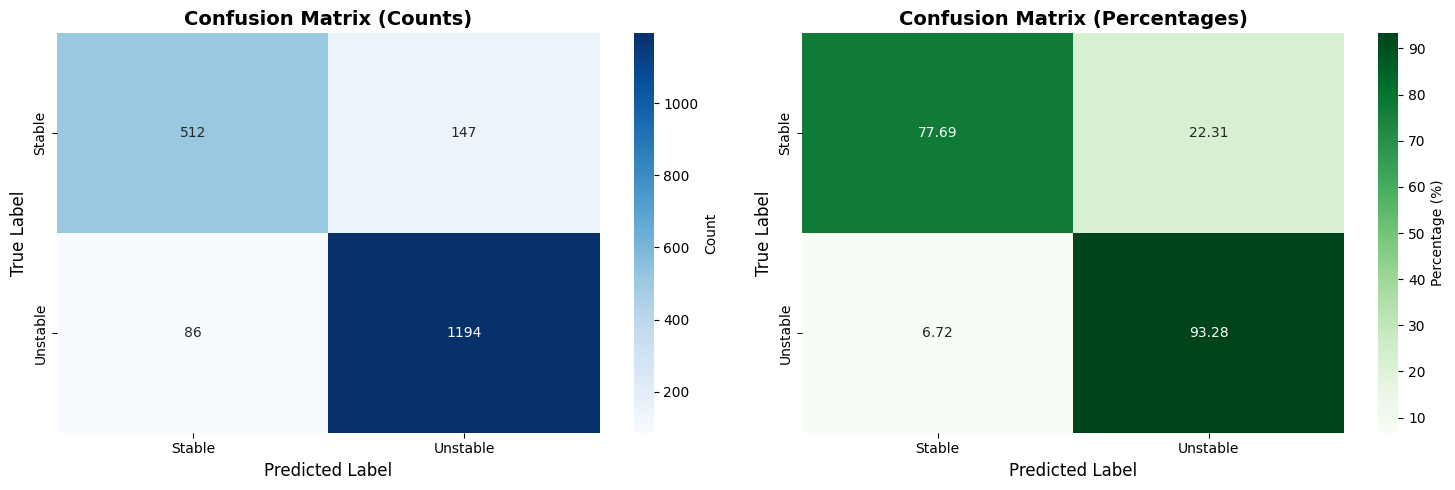


True Negatives (Stable correctly predicted): 512
False Positives (Stable predicted as Unstable): 147
False Negatives (Unstable predicted as Stable): 86
True Positives (Unstable correctly predicted): 1194


In [641]:
# Entrenar modelo de clasificacion
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df_features
y = df['stab'].apply(lambda x: 0 if x <= 0 else 1)  # 0 for stable, 1 for unstable  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Classification Report
print("="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['Stable', 'Unstable']))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap with counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stable', 'Unstable'],
            yticklabels=['Stable', 'Unstable'],
            cbar_kws={'label': 'Count'},
            ax=axes[0])
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Heatmap with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=['Stable', 'Unstable'],
            yticklabels=['Stable', 'Unstable'],
            cbar_kws={'label': 'Percentage (%)'},
            ax=axes[1])
axes[1].set_title('Confusion Matrix (Percentages)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print(f"True Negatives (Stable correctly predicted): {cm[0,0]}")
print(f"False Positives (Stable predicted as Unstable): {cm[0,1]}")
print(f"False Negatives (Unstable predicted as Stable): {cm[1,0]}")
print(f"True Positives (Unstable correctly predicted): {cm[1,1]}")
print("="*60)


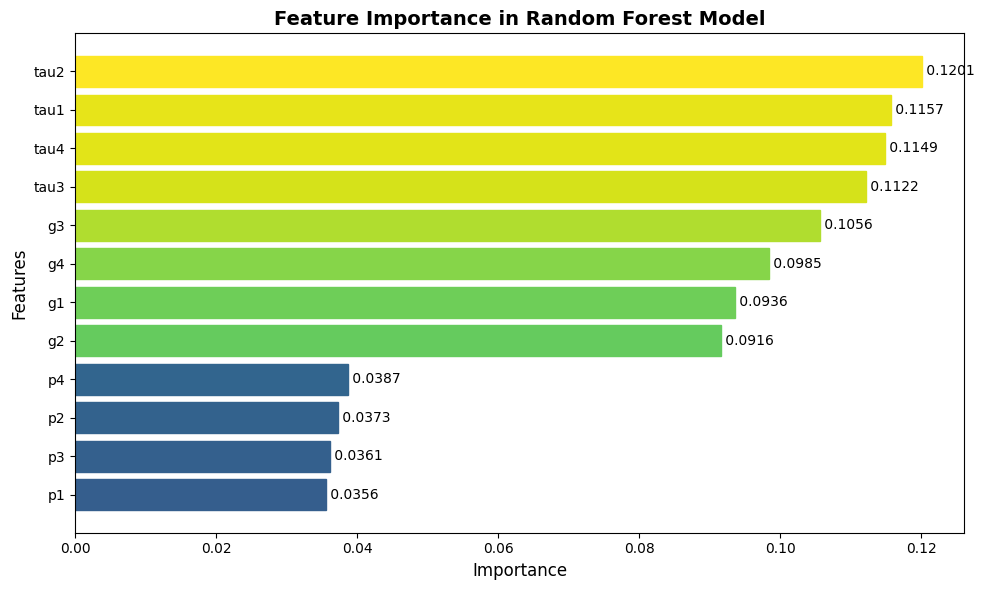


Top 5 Most Important Features:
feature  importance
   tau2    0.120099
   tau1    0.115725
   tau4    0.114938
   tau3    0.112224
     g3    0.105588


In [642]:
# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['feature'], feature_importance['importance'])

# Color bars by importance level
colors = plt.cm.viridis(feature_importance['importance'] / feature_importance['importance'].max())
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in Random Forest Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    plt.text(row['importance'], i, f" {row['importance']:.4f}", 
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head().to_string(index=False))


### Deep Learning

In [643]:
# Deep learning model for Electrical Stability

import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split

# Prepare data from our dataframe
X = df_features.values  # Convert to numpy array
y = df['stab'].apply(lambda x: 0 if x <= 0 else 1).values  # 0 for stable, 1 for unstable

# Split data: 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

# Define neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
print("\nModel Architecture:")
model.summary()

# Train
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n{'='*60}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"{'='*60}")


Training set: 5816 samples
Validation set: 1939 samples
Test set: 1939 samples
Number of features: 12

Model Architecture:


/home/santisil/personal/learn/analisis-datos/ElectricalStability/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6556 - loss: 0.6215 - val_accuracy: 0.7256 - val_loss: 0.5407
Epoch 2/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6556 - loss: 0.6215 - val_accuracy: 0.7256 - val_loss: 0.5407
Epoch 2/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7149 - loss: 0.5567 - val_accuracy: 0.7602 - val_loss: 0.4891
Epoch 3/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7149 - loss: 0.5567 - val_accuracy: 0.7602 - val_loss: 0.4891
Epoch 3/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.7307 - loss: 0.5357 - val_accuracy: 0.7937 - val_loss: 0.4705
Epoch 4/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.7307 - loss: 0.5357 - val_accuracy: 0.7937 - val_loss: 0.4705
Epoch 4/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.7605 - loss: 0.5021 - val_accuracy: 0.7906 - val_loss: 0.4586
Epoch 5/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.7605 - loss: 0.5021 - val_accu

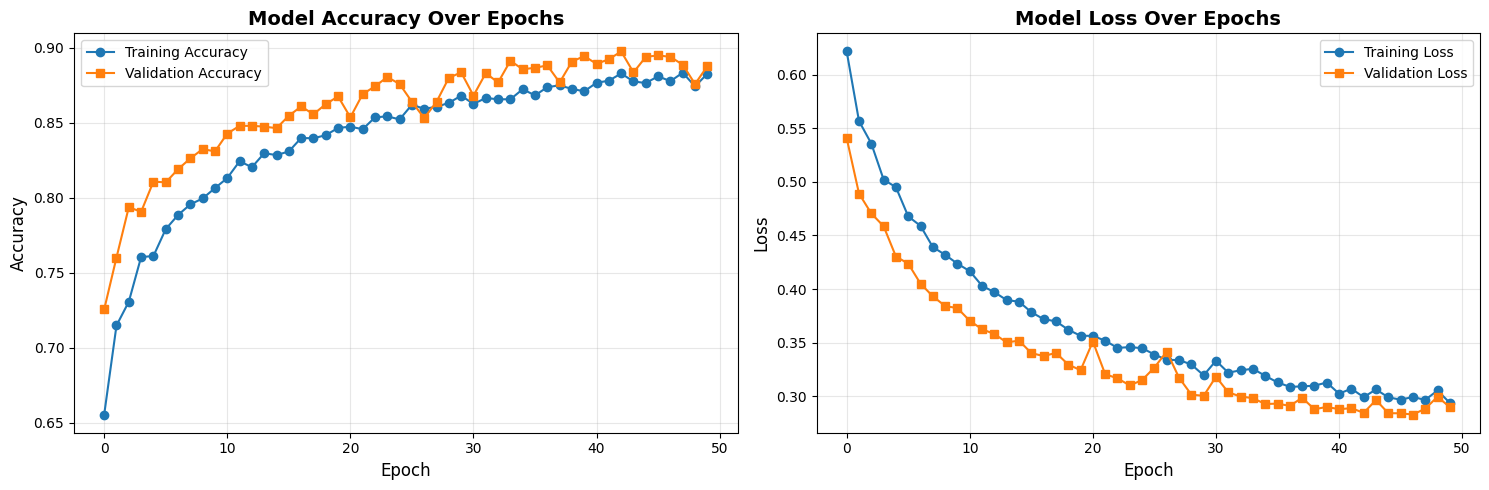


Best validation accuracy: 0.8974 at epoch 43


In [644]:
# Visualize training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
axes[0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='s')
axes[1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find best epoch
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = max(history.history['val_accuracy'])
print(f"\nBest validation accuracy: {best_val_acc:.4f} at epoch {best_epoch}")


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step
DEEP LEARNING MODEL - CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Stable       0.82      0.88      0.85       660
    Unstable       0.94      0.90      0.92      1279

    accuracy                           0.89      1939
   macro avg       0.88      0.89      0.88      1939
weighted avg       0.90      0.89      0.89      1939

DEEP LEARNING MODEL - CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Stable       0.82      0.88      0.85       660
    Unstable       0.94      0.90      0.92      1279

    accuracy                           0.89      1939
   macro avg       0.88      0.89      0.88      1939
weighted avg       0.90      0.89      0.89      1939



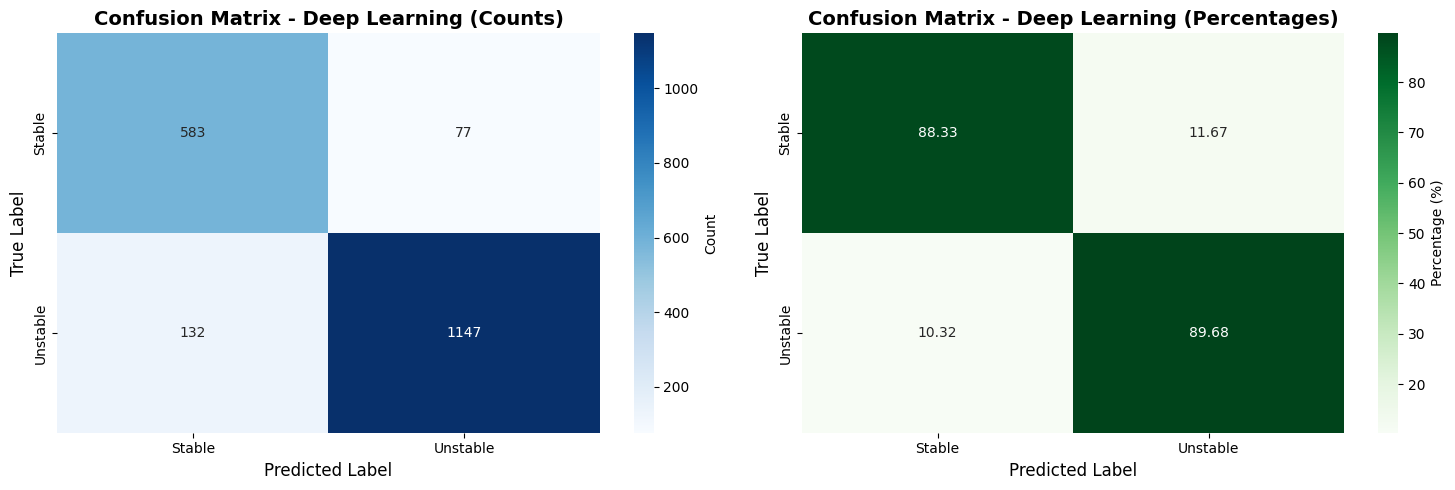


True Negatives (Stable correctly predicted): 583
False Positives (Stable predicted as Unstable): 77
False Negatives (Unstable predicted as Stable): 132
True Positives (Unstable correctly predicted): 1147


In [645]:
# Predictions and Confusion Matrix for Deep Learning Model
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Classification Report
print("="*60)
print("DEEP LEARNING MODEL - CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['Stable', 'Unstable']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap with counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stable', 'Unstable'],
            yticklabels=['Stable', 'Unstable'],
            cbar_kws={'label': 'Count'},
            ax=axes[0])
axes[0].set_title('Confusion Matrix - Deep Learning (Counts)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Heatmap with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=['Stable', 'Unstable'],
            yticklabels=['Stable', 'Unstable'],
            cbar_kws={'label': 'Percentage (%)'},
            ax=axes[1])
axes[1].set_title('Confusion Matrix - Deep Learning (Percentages)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print(f"True Negatives (Stable correctly predicted): {cm[0,0]}")
print(f"False Positives (Stable predicted as Unstable): {cm[0,1]}")
print(f"False Negatives (Unstable predicted as Stable): {cm[1,0]}")
print(f"True Positives (Unstable correctly predicted): {cm[1,1]}")
print("="*60)
